In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from imblearn.under_sampling import RandomUnderSampler
from scipy.optimize import minimize_scalar # 标量最小化函数库
from matplotlib import cm # 导入颜色映射模块
plt.rcParams["font.family"]="STSong"
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [42]:
# 读取附件数据
df1 = pd.read_excel('附件1.xlsx')
df2 = pd.read_excel('附件2.xlsx')
df3 = pd.read_excel('附件3.xlsx')
df4 = pd.read_excel('附件4.xlsx')
df2 = df2.query('销售类型 == "销售"') # 仅保留销售类型为销售的

In [43]:
# 根据可售单品信息.xlsx，从附件中筛选出可售单品
df5 = pd.read_excel('可售单品信息.xlsx')
df2 = df2[df2['单品编码'].isin(df5['单品编码'])] # 仅保留可售单品的数据
df3 = df3[df3['单品编码'].isin(df5['单品编码'])] # 仅保留可售单品的数据

In [44]:
# 按单品分组，计算日均销售单价、日均销量、日均销售额
df2['销售日期'] = pd.to_datetime(df2['销售日期'])
df2['月份'] = df2['销售日期'].dt.month
df2['年份'] = df2['销售日期'].dt.year
df2['日'] = df2['销售日期'].dt.day  # 添加了日这一列
df2 = df2.merge(df1, on='单品编码', how='left')
df2['销售额'] = df2['销量(千克)'] * df2['销售单价(元/千克)']
grouped_df2 = df2.groupby(['单品编码', '年份', '月份', '日']).agg(
    {'销售额': 'sum', '销量(千克)': 'sum', '销售单价(元/千克)': 'mean'})  # 按日分组
grouped_df2.rename(columns={'销售单价(元/千克)': '日均销售单价', '销量(千克)': '日均销量'}, inplace=True)
grouped_df2 = grouped_df2.reset_index()

In [45]:
# 按日计算日均批发价格
df3['销售日期'] = pd.to_datetime(df3['销售日期'])
df3['月份'] = df3['销售日期'].dt.month
df3['年份'] = df3['销售日期'].dt.year
df3['日'] = df3['销售日期'].dt.day  # 添加了日这一列
grouped_df3 = df3.groupby(['单品编码', '年份', '月份', '日']).agg({'批发价格(元/千克)': 'mean'})  # 按日分组
grouped_df3.rename(columns={'批发价格(元/千克)': '日均批发价格'}, inplace=True)
grouped_df3 = grouped_df3.reset_index()

In [46]:
# 合并数据，计算日均成本和日均利润
merged_df = grouped_df2.merge(grouped_df3, on=['单品编码', '年份', '月份', '日'], how='left')
merged_df = merged_df.merge(df4, on='单品编码', how='left')
merged_df['日均成本'] = merged_df['日均销量'] * (1 + merged_df['损耗率(%)'] / 100) * merged_df['日均批发价格']
merged_df['日均利润'] = merged_df['销售额'] - merged_df['日均成本']

In [47]:
# 对数据按日均销售单价进行随机下采样
rus = RandomUnderSampler(random_state=0) # 创建随机下采样对象
X = merged_df['日均销售单价'].values.reshape(-1, 1) # 将日均销售单价转换为二维数组
y = merged_df['单品名称'] # 将单品名称作为目标变量
X_resampled, y_resampled = rus.fit_resample(X, y) # 对数据进行随机下采样
resampled_df = pd.DataFrame({'日均销售单价': X_resampled.flatten(), '单品名称': y_resampled}) # 将下采样后的数据转换为数据框
resampled_df = resampled_df.merge(merged_df, on=['日均销售单价', '单品名称']) # 将下采样后的数据与原始数据合并，保留其他特征

七彩椒(2)的回归方程为：y = 3.13*exp(-((x-25.80)/0.42)^2)
上海青的回归方程为：y = 21.83*exp(-((x-7.43)/2.52)^2)
云南油麦菜的回归方程为：y = 29.55*exp(-((x-7.26)/-8.80)^2)
云南油麦菜(份)的回归方程为：y = 65.63*exp(-((x-4.78)/1.24)^2)
云南生菜的回归方程为：y = 57.55*exp(-((x-9.32)/-4.14)^2)
云南生菜(份)的回归方程为：y = 61.81*exp(-((x-4.20)/-0.43)^2)
净藕(1)的回归方程为：y = 1040.24*exp(-((x-51.54)/25.34)^2)
双孢菇(盒)的回归方程为：y = 3.13*exp(-((x-5.90)/0.42)^2)
圆茄子(2)的回归方程为：y = 6523.03*exp(-((x--659.17)/251.47)^2)
外地茼蒿的回归方程为：y = 11.91*exp(-((x-17.05)/7.52)^2)
奶白菜的回归方程为：y = 18.35*exp(-((x-6.03)/2.78)^2)
姜蒜小米椒组合装(小份)的回归方程为：y = 14.85*exp(-((x-4.21)/0.56)^2)
娃娃菜的回归方程为：y = 1748715284908.91*exp(-((x-292.83)/57.10)^2)
小皱皮(份)的回归方程为：y = 22.51*exp(-((x-4.22)/2.13)^2)
小米椒(份)的回归方程为：y = 65.64*exp(-((x-2.09)/5.45)^2)
小青菜(1)的回归方程为：y = 335816835551.13*exp(-((x-410.32)/82.76)^2)
木耳菜的回归方程为：y = 14570.04*exp(-((x-272.94)/99.39)^2)
木耳菜(份)的回归方程为：y = 2.35*exp(-((x-4.45)/1.27)^2)
枝江青梗散花的回归方程为：y = 231280197016748.62*exp(-((x--556.13)/103.91)^2)
洪湖藕带的回归方程为：y = 4219023031979114112016529666849776525

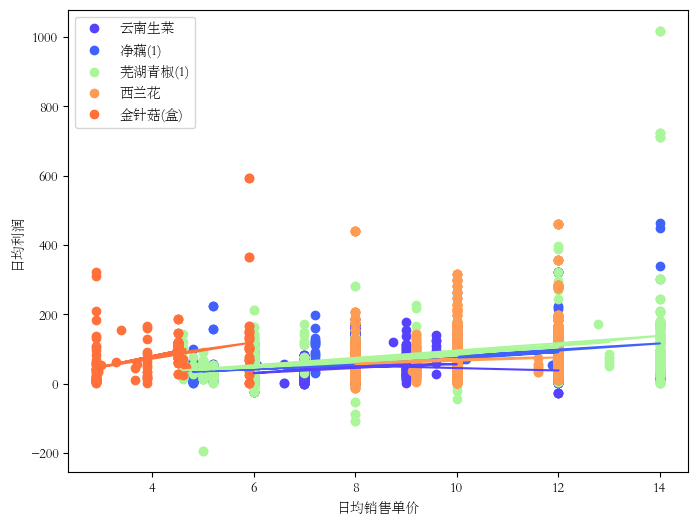

In [51]:
# 定义一个高斯函数的形式，用于非线性回归
def gauss_func(x, a1, b1, c1):
    return a1 * np.exp(-((x - b1) / c1)**2) # 定义高斯函数的形式

# 画出日均利润-日均销售单价的关系图，用非线性回归方法拟合出日均利润和日均销售单价的关系
plt.figure(figsize=(8, 6))
colors = cm.rainbow(np.linspace(0, 1, len(resampled_df['单品名称'].unique())))
# 选择销量前五的单品
top_sales = merged_df.groupby('单品名称')['日均销量'].sum().sort_values(ascending=False).head(5).index
for i, item in enumerate(resampled_df['单品名称'].unique()):
    sub_df = resampled_df[resampled_df['单品名称'] == item]
    # 计算去掉前10%和后10%后的上下分位数
    lower_quantile = sub_df['日均销售单价'].quantile(0.10)
    upper_quantile = sub_df['日均销售单价'].quantile(0.90)

    # 去掉异常值
    sub_df = sub_df[(sub_df['日均销售单价'] >= lower_quantile) & (sub_df['日均销售单价'] <= upper_quantile)]

    if item in top_sales: # 如果是销量前五的单品，就画散点图
        plt.scatter(sub_df['日均销售单价'], sub_df['日均利润'], label=item, color=colors[i]) 
    X = sub_df['日均销售单价']
    y = sub_df['日均利润']
    initial_b1 = X.mean()
    p0 = [a1, initial_b1, initial_c1]
    popt, pcov = curve_fit(gauss_func, X, y, p0=p0, maxfev=100000)
    if item in top_sales: # 如果是销量前五的单品，就画散点图
        plt.plot(X, gauss_func(X, *popt), color=colors[i]) 
    print(f'{item}的回归方程为：y = {popt[0]:.2f}*exp(-((x-{popt[1]:.2f})/{popt[2]:.2f})^2)') # 输出了回归方程
plt.xlabel('日均销售单价')
plt.ylabel('日均利润')
plt.legend()
plt.savefig('(单品)单价-利润曲线图关系图.png', dpi=600)

In [52]:
# 优化日均利润，找到最大值，得到对应单品的单价和补货量
prices = []
profits = []
replenishments = []
for item in resampled_df['单品名称'].unique():
    sub_df = resampled_df[resampled_df['单品名称'] == item]
    # 计算去掉前10%和后10%后的上下分位数
    lower_quantile = sub_df['日均销售单价'].quantile(0.10)
    upper_quantile = sub_df['日均销售单价'].quantile(0.90)

    # 去掉异常值
    sub_df = sub_df[(sub_df['日均销售单价'] >= lower_quantile) & (sub_df['日均销售单价'] <= upper_quantile)]
    X = sub_df['日均销售单价']
    y = sub_df['日均利润']
    initial_b1 = X.mean()
    p0 = [a1, initial_b1, initial_c1]
    popt, pcov = curve_fit(gauss_func, X, y, p0=p0, maxfev=100000)
    a1 = popt[0]
    b1 = popt[1]
    c1 = popt[2]
    def profit_func(x): # 定义利润函数，用于寻优
        return -gauss_func(x, a1, b1, c1) # 取负号是因为要求最大值，而寻优函数默认求最小值
    bounds = (0.01, 100) # 设置单价的下界为0.01，上界为100
    result = minimize_scalar(profit_func, bounds = bounds) # 使用标量最小化函数寻优
    p_opt = result.x # 得到最优单价
    profit_opt = -result.fun # 得到最大利润
    prices.append([item, p_opt])
    profits.append([item, profit_opt])
    q_opt = np.interp(p_opt, X, sub_df['日均销量']) # 使用线性插值方法得到对应的日均销量
    r = sub_df['损耗率(%)'].mean() / 100 # 计算损耗率的平均值
    replenishment_opt = q_opt * (1 + r) # 计算补货量
    replenishments.append([item, replenishment_opt])
prices_df = pd.DataFrame(prices, columns=['单品名称', '最优单价'])
prices_df.to_csv('(问题3)最优单价.csv', index=False,  encoding='utf_8_sig')
profits_df = pd.DataFrame(profits, columns=['单品名称', '最大利润']) 
profits_df.to_csv('(问题3)最大利润.csv', index=False,  encoding='utf_8_sig')
replenishments_df = pd.DataFrame(replenishments, columns=['单品名称', '补货量']) 
replenishments_df.to_csv('(问题3)补货量.csv', index=False,  encoding='utf_8_sig')